In [1]:
import missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 설정.
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'

import seaborn as sns
plt.style.use('seaborn-whitegrid')

# 딥러닝.
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils
import tensorflow as tf

# 다중분류를 위한 핫-윈 인코더.
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수.
from keras.models import load_model

# epoch마다 모델을 저장하는 함수.
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수.
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 랜덤 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# MNIST 데이터 읽기.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 2차원으로 되어 있는 이미지 한장의 데이터를 1차원으로 변환한다.
X_train = X_train.reshape(X_train.shape[0], 784)
# 학습 효율을 높히기 위해 모든 값을 0에서 1사이로 조정한다.
X_train = X_train.astype('float32')
X_train = X_train / 255

# 2차원으로 되어 있는 이미지 한장의 데이터를 1차원으로 변환.
X_test = X_test.reshape(X_test.shape[0], 784)
# 학습 효율을 높히기 위해 모든 값을 0에서 1사이로 조정.
X_test = X_test.astype('float32')
X_test = X_test / 255

In [4]:
# 결과 데이터 핫 윈 인코딩.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
# 모델 설정..
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 콜백 조건 설정.
modelpath = 'models/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
callback2 = EarlyStopping(monitor='val_loss', patience=10)

# 학습.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100, 
                    verbose=1, callbacks=[callback1, callback2])

Epoch 1/30
600/600 [==============================] - 3s 3ms/step - loss: 0.4270 - accuracy: 0.8806 - val_loss: 0.1268 - val_accuracy: 0.9623

Epoch 00001: val_loss improved from inf to 0.12676, saving model to models\1-0.1267630159854889.hdf5
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1041 - accuracy: 0.9702 - val_loss: 0.0836 - val_accuracy: 0.9749

Epoch 00002: val_loss improved from 0.12676 to 0.08359, saving model to models\2-0.08359336853027344.hdf5
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0606 - accuracy: 0.9822 - val_loss: 0.0868 - val_accuracy: 0.9706

Epoch 00003: val_loss did not improve from 0.08359
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0467 - accuracy: 0.9864 - val_loss: 0.0701 - val_accuracy: 0.9777

Epoch 00004: val_loss improved from 0.08359 to 0.07009, saving model to models\4-0.07008878886699677.hdf5
Epoch 5/30
600/600 [==============================] - 2s 3ms/ste

In [6]:
# 모델 로딩.
best_model = load_model('models/8-0.06742234528064728.hdf5')

# Test dataset을 통한 정확도 측정.
best_model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9807


0.9807000160217285

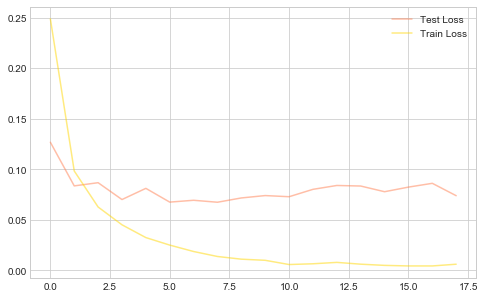

In [7]:
# 테스트 데이터 오차.
y_vloss = history.history['val_loss']

# 학습 데이터의 오차.
y_loss = history.history['loss']

# 그래프.
# 오차 발생 정도의 차가 너무 큼.
plt.figure(figsize=(8,5))
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, label='Test Loss', c='coral', alpha=.5)
plt.plot(x_len, y_loss,  label='Train Loss', c='gold', alpha=.5)
plt.legend()
plt.show()